In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import glob
import os
import scipy.stats as scst
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
Voltages = np.arange(8,12,.25)

In [4]:
ths = np.arange(1,50,.25)

In [5]:
Charges = np.array([0.8132257,
                    1.5865325,
                    2.3684855,
                    3.2082176,
                    4.7894497,
                    6.646965,
                    8.472308,
                    10.798604,
                    13.433296,
                    16.30832,
                    19.799797,
                    23.177198,
                    26.803143,
                    30.994562,
                    35.410213,
                    39.004436])


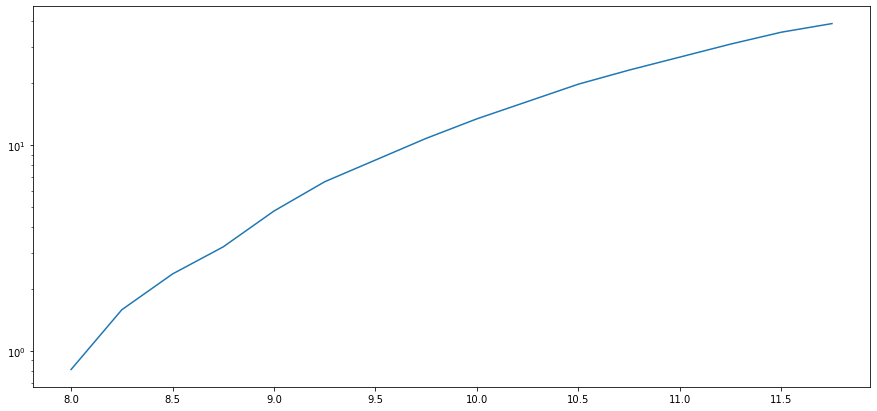

In [6]:
plt.plot(Voltages,Charges)
plt.gca().set_yscale('log')

In [7]:
all_L1rates = np.load('./L1_rates_1LED.npy')
all_L1rates.shape

(16, 196)

In [8]:
def ncdf(th,mu,sigma):
    return scst.norm(mu,sigma).cdf(th)

In [9]:
L1rates = all_L1rates[10]

array([18.67087861,  3.00035176])

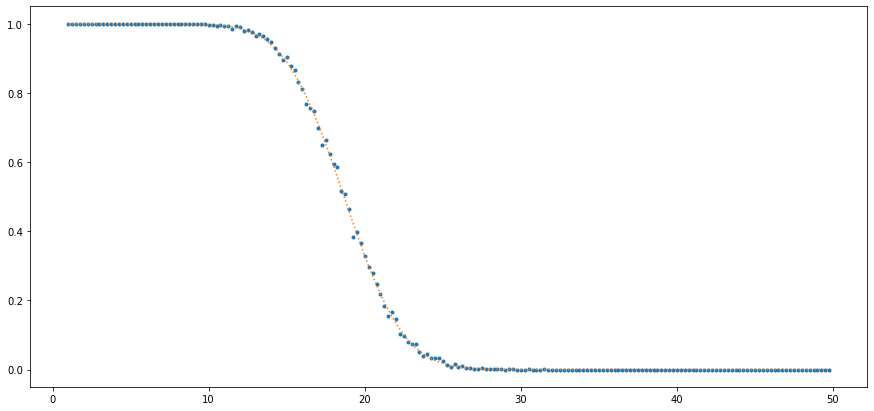

In [10]:
plt.plot(ths,L1rates/1000,'.')
pp,pcov = curve_fit(ncdf,ths,1-L1rates/1000.)
plt.plot(ths,1-ncdf(ths,*pp),':')
pp

In [11]:
tot = 2 **7
pnt = 1+7+21+7+3
1-pnt/tot

0.6953125

In [12]:
1-ncdf(16.3,*pp)

0.7852945751871473

(0, 50)

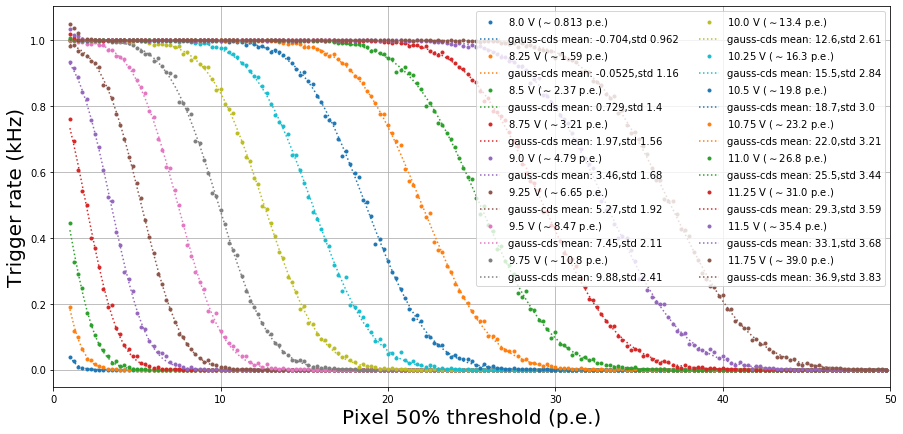

In [13]:
means = []
stds  = []
for ii,V in enumerate(Voltages):

        pp,pcov = curve_fit(ncdf,ths,1-all_L1rates[ii]/1000.)
        eb = plt.plot(ths,all_L1rates[ii]/1000,'.',label = '{} V ($\sim${:.3} p.e.)'.format(V,Charges[ii]))
        plt.plot(ths,1-ncdf(ths,*pp),':',color=eb[0].get_color(),
                 label = 'gauss-cds mean: {:.3},std {:.3}'.format(*pp))
        means.append(pp[0])
        stds.append(pp[1])

        
plt.grid()
plt.gca().legend(prop={'size':10},loc='upper right',ncol=2)
plt.gca().set_xlabel('Pixel 50% threshold (p.e.)',fontsize=20)
plt.gca().set_ylabel('Trigger rate (kHz)',fontsize=20)
plt.gca().set_xlim(0,50)

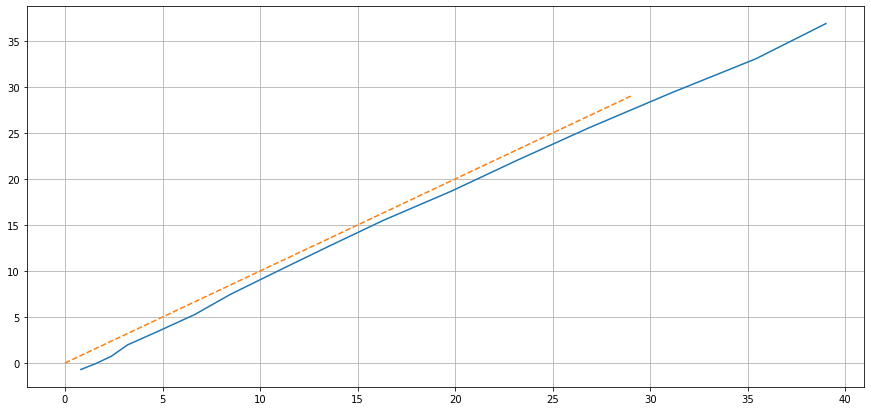

In [14]:
plt.plot(Charges[:len(means)],means)
plt.plot(range(30),range(30),'--')
plt.grid()

array([0.36863903])

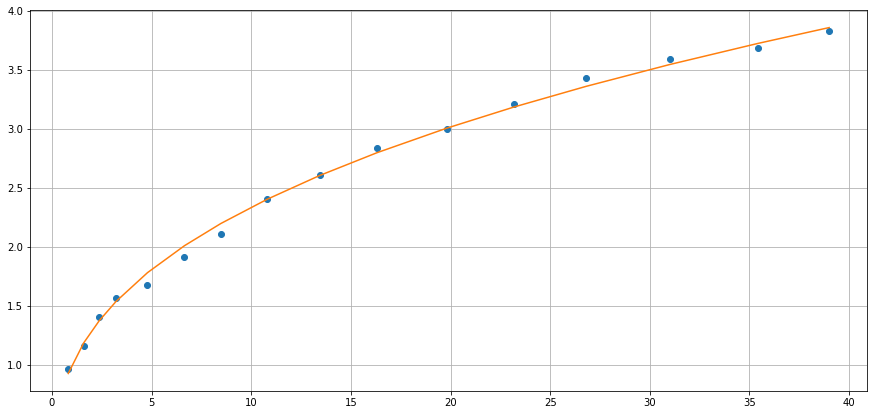

In [16]:
plt.plot(Charges[:len(stds)],np.array(stds),'o')
pps,pcovs = curve_fit(lambda x,b: x**b,Charges[:len(stds)],np.array(stds))
plt.plot(Charges[:len(stds)],Charges[:len(stds)]**pps[0])
plt.grid()
pp